In [216]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [217]:
# Importa as bibliotecas
import numpy as np
from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
# Lê o documento .csv
df = pd.read_csv('dados_produtos.csv')

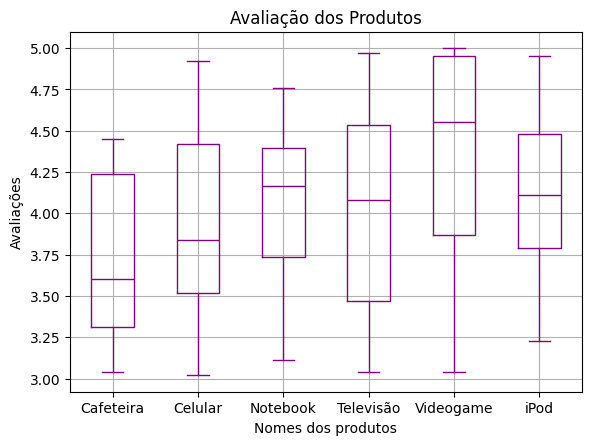

In [219]:
# Faz um boxplot das notas dos produtos

df.boxplot(column='rating', by='product_name', color='purple')
plt.grid(True)
plt.title("Avaliação dos Produtos")
plt.xlabel("Nomes dos produtos")
plt.ylabel("Avaliações")
plt.suptitle('')
plt.show()

In [220]:
# Mostra tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [221]:
# Exibe informações gerais
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [222]:
# Dados treino e teste
dados_treino = df['rating'].values 
dados_teste = df['rating'].values

Avaliação: 3.04 Avaliação prevista: 3.04
Avaliação: 3.46 Avaliação prevista: 3.46
Avaliação: 3.25 Avaliação prevista: 3.25
Avaliação: 3.77 Avaliação prevista: 3.77
Avaliação: 5.0 Avaliação prevista: 5.0
Avaliação: 3.98 Avaliação prevista: 3.98
Avaliação: 3.5 Avaliação prevista: 3.5
Avaliação: 4.76 Avaliação prevista: 4.76
Avaliação: 3.94 Avaliação prevista: 3.94
Avaliação: 4.68 Avaliação prevista: 4.68
Avaliação: 4.43 Avaliação prevista: 4.43
Avaliação: 3.14 Avaliação prevista: 3.14
Avaliação: 4.42 Avaliação prevista: 4.42
Avaliação: 3.14 Avaliação prevista: 3.14
Avaliação: 3.62 Avaliação prevista: 3.62
Avaliação: 4.1 Avaliação prevista: 4.1
Avaliação: 3.93 Avaliação prevista: 3.93
Avaliação: 4.61 Avaliação prevista: 4.61
Avaliação: 4.18 Avaliação prevista: 4.18
Avaliação: 3.11 Avaliação prevista: 3.11
Avaliação: 4.24 Avaliação prevista: 4.24
Avaliação: 4.95 Avaliação prevista: 4.95
Avaliação: 4.49 Avaliação prevista: 4.49
Avaliação: 3.6 Avaliação prevista: 3.6
Avaliação: 4.92 Avaliaçã

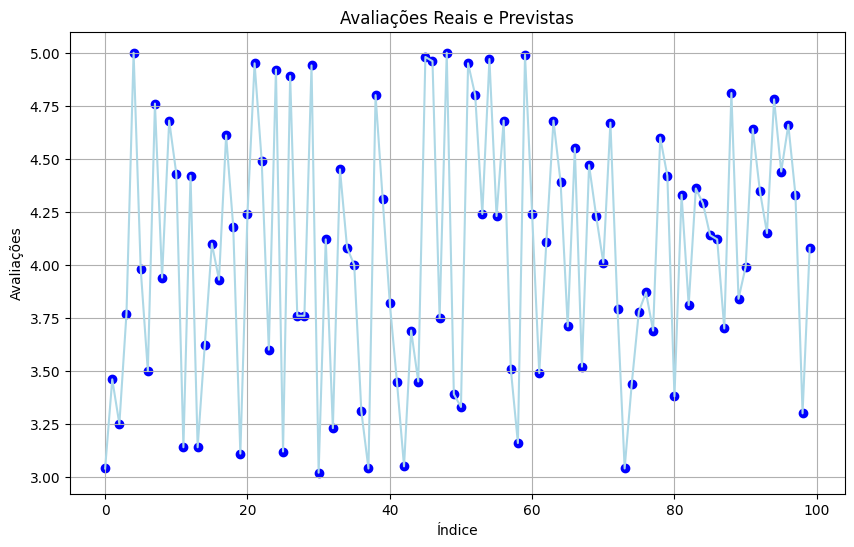

In [223]:
for i in range(len(dados_teste)):
    print(f"Avaliação: {dados_treino[i]} Avaliação prevista: {dados_teste[i]}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(dados_treino)), dados_treino, color='blue', label='Avaliações Reais')
plt.plot(range(len(dados_teste)), dados_teste, color='lightblue', label='Avaliações Previstas')
plt.title('Avaliações Reais e Previstas')
plt.xlabel('Índice')
plt.ylabel('Avaliações')
plt.grid(True)
plt.show()

['Televisão' 'Celular' 'Cafeteira' 'Videogame' 'iPod' 'Notebook']
Arvore de decisão  Televisão


C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


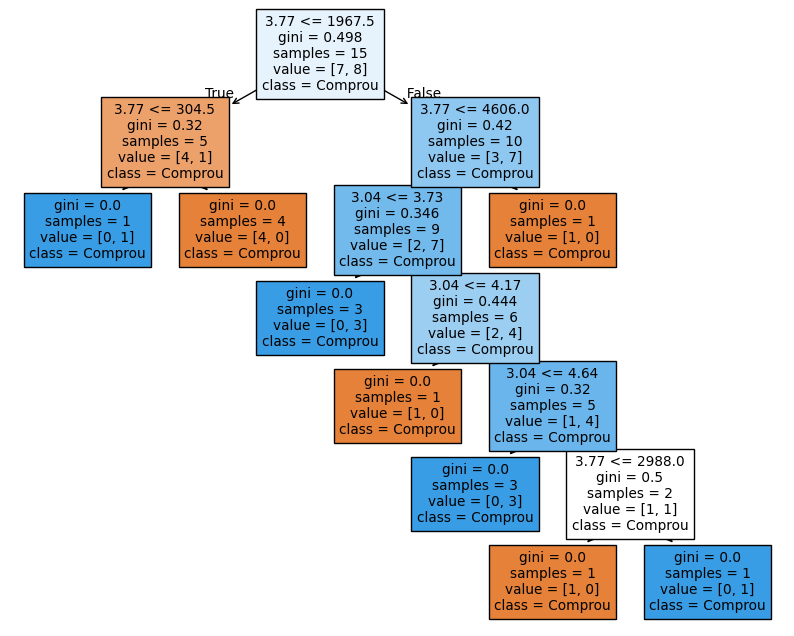

Arvore de decisão  Celular


C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


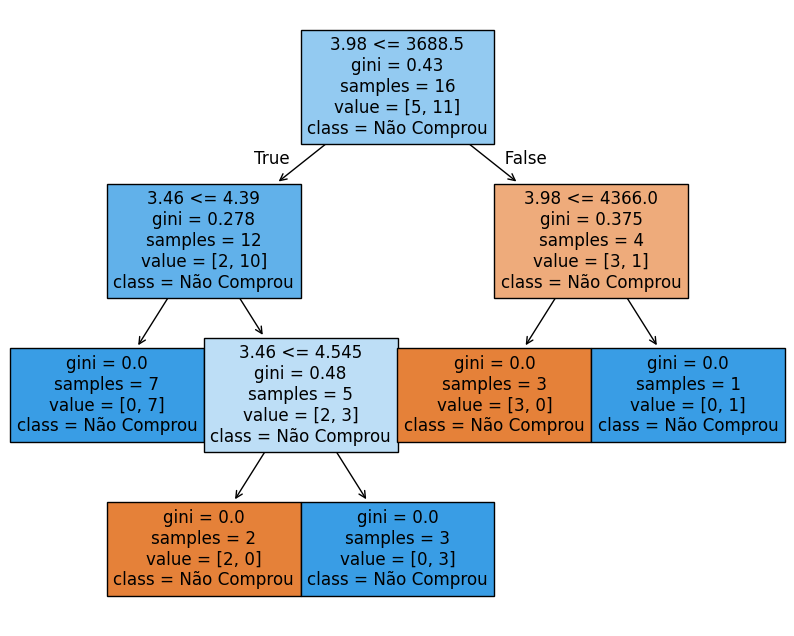

Arvore de decisão  Cafeteira


C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


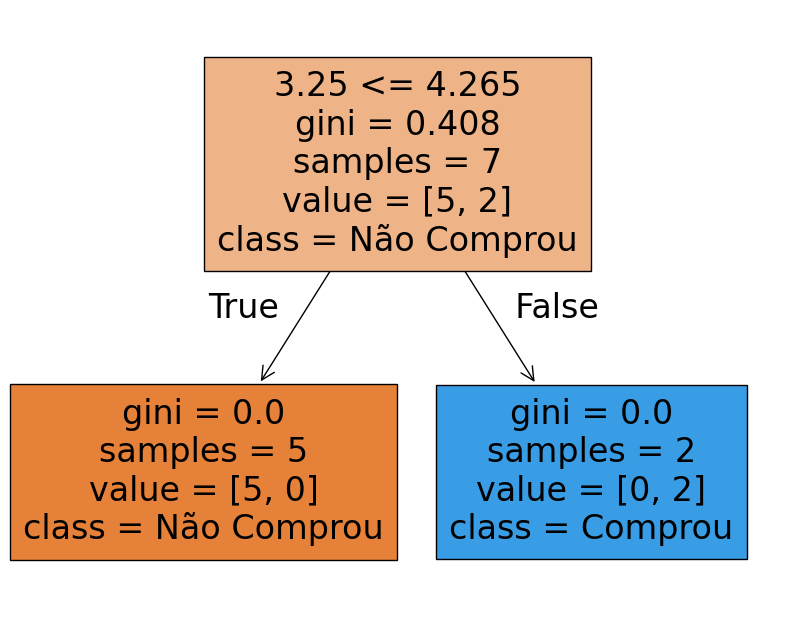

C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


Arvore de decisão  Videogame


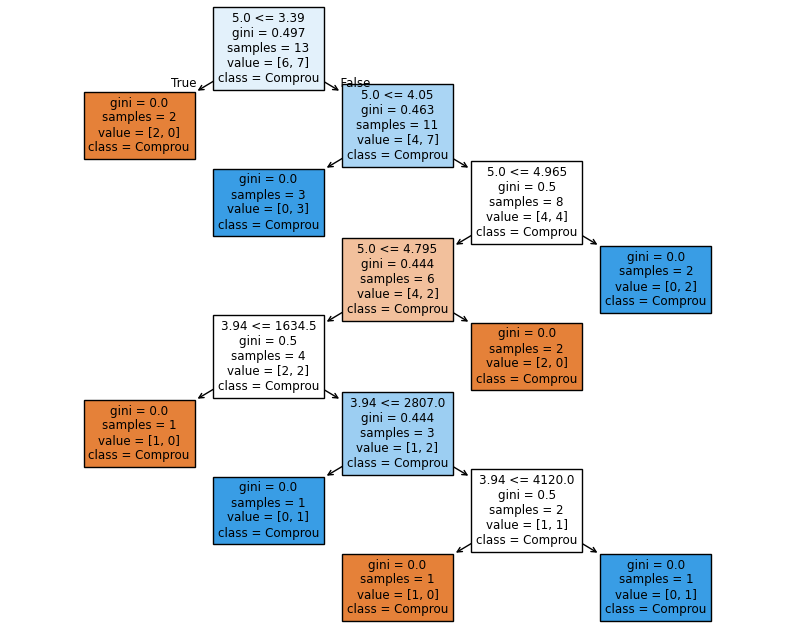

Arvore de decisão  iPod


C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


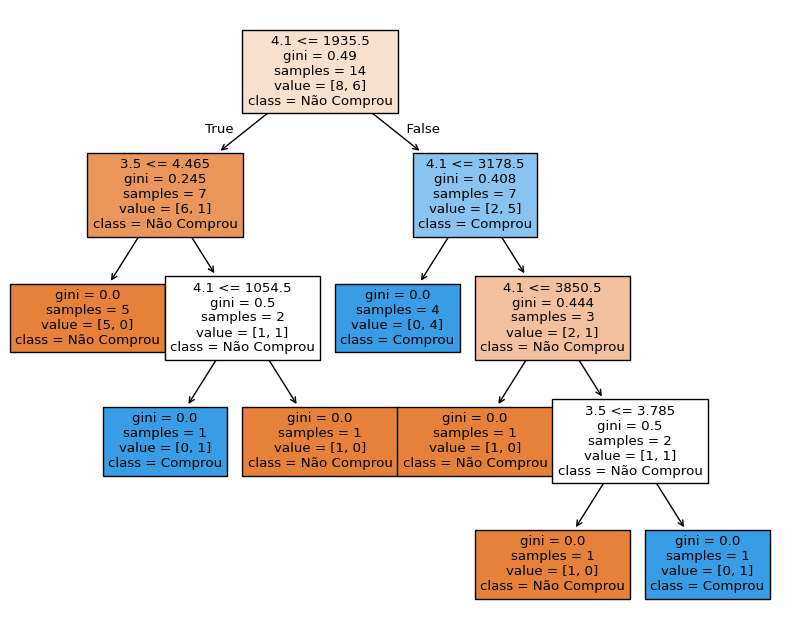

Arvore de decisão  Notebook


C:\Users\dsadm\AppData\Local\Temp\ipykernel_3156\3139254692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


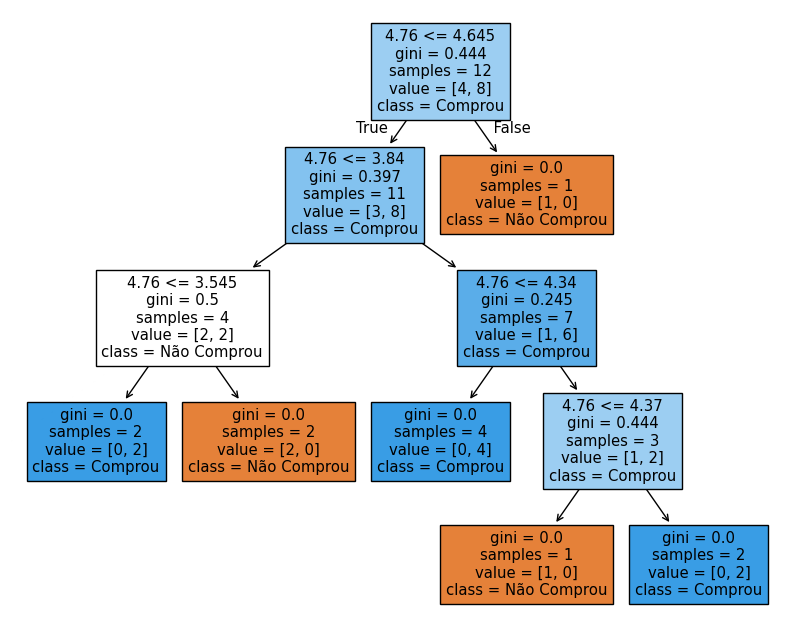

In [167]:
# Criando árvore de decisão

x = np.array(df['rating'])
y = np.array(df['product_name'])

produtos = df['product_name'].unique()
print(produtos)

for produto in produtos:
    print('Arvore de decisão ',produto)

    produto_df = df.loc[df['product_name'] == produto]

    X = produto_df.drop(['purchased','product_name'],axis=1) 
    y = produto_df['purchased']

 # Treinando a árvore de decisão

    X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    prev = model.predict(X_test)


    fig = plt.figure(figsize=(10, 8))
    tree.plot_tree(model, feature_names=produto_df['rating'].tolist(), class_names=produto_df['purchased'].tolist(), filled=True)
    plt.show()

Árvore de decisão para Televisão
Matriz de Confusão:
[[1 0]
 [2 1]]
Acurácia: 0.50
Precisão: 1.00
Recall: 0.33
F1-Score: 0.50


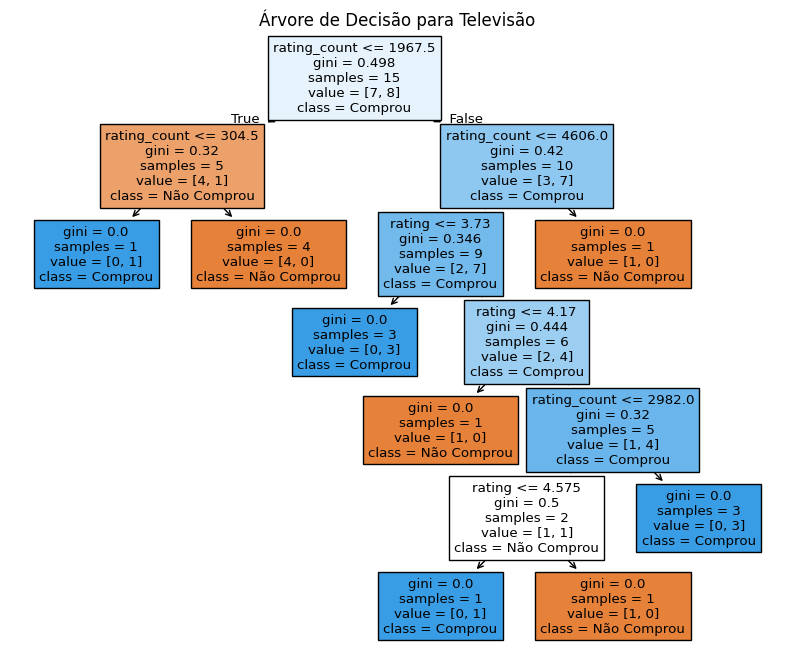

Árvore de decisão para Celular
Matriz de Confusão:
[[1 2]
 [0 2]]
Acurácia: 0.60
Precisão: 0.50
Recall: 1.00
F1-Score: 0.67


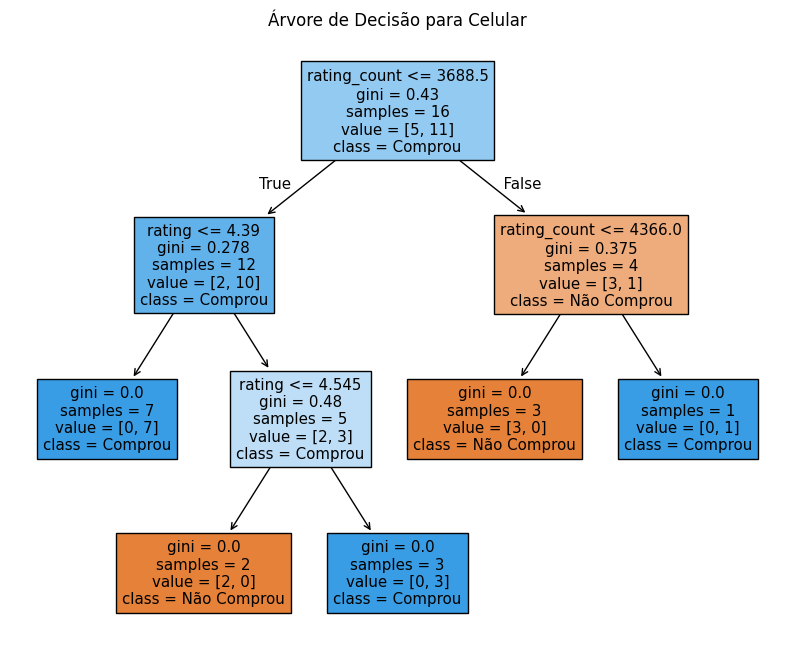

Árvore de decisão para Cafeteira
Matriz de Confusão:
[[1 0]
 [1 0]]
Acurácia: 0.50
Precisão: 0.00
Recall: 0.00
F1-Score: 0.00


C:\Users\dsadm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


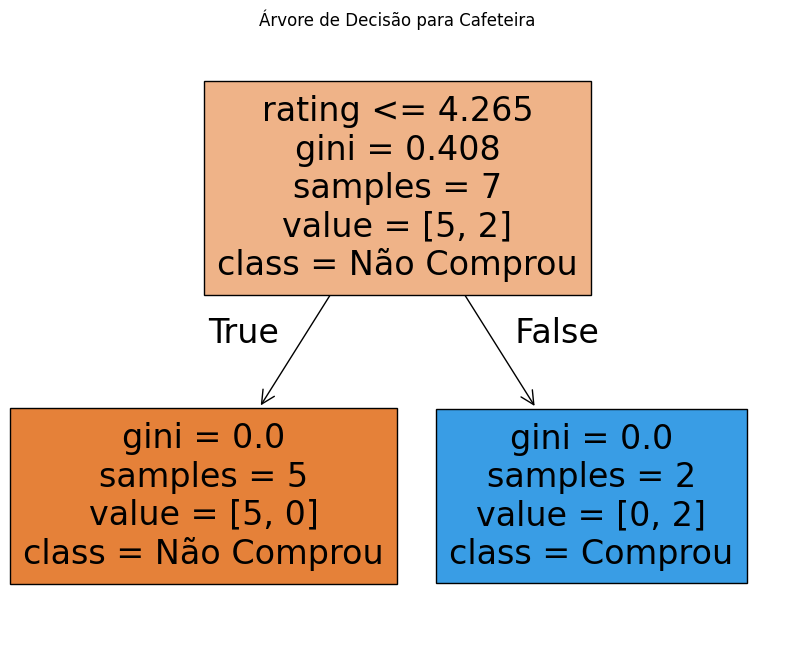

Árvore de decisão para Videogame
Matriz de Confusão:
[[4]]
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


C:\Users\dsadm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


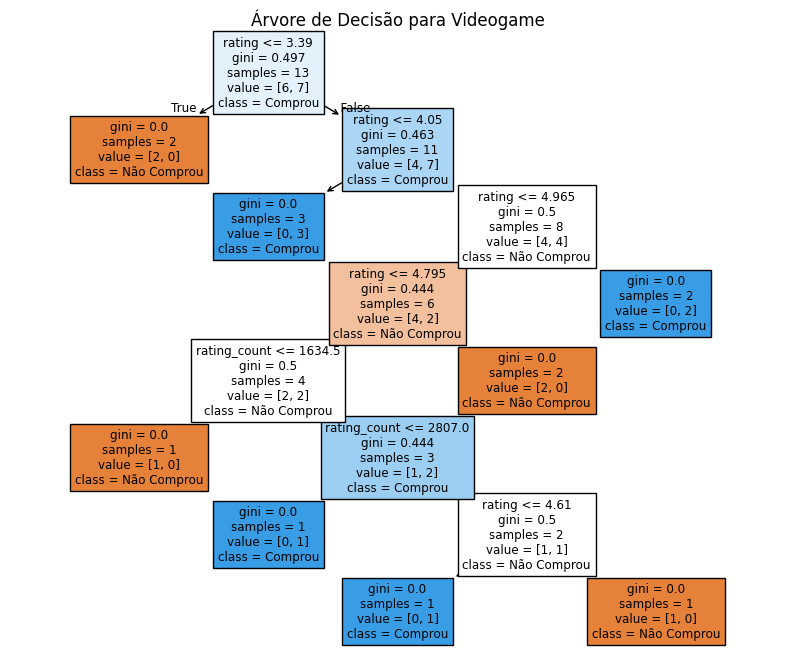

Árvore de decisão para iPod
Matriz de Confusão:
[[1 1]
 [1 1]]
Acurácia: 0.50
Precisão: 0.50
Recall: 0.50
F1-Score: 0.50


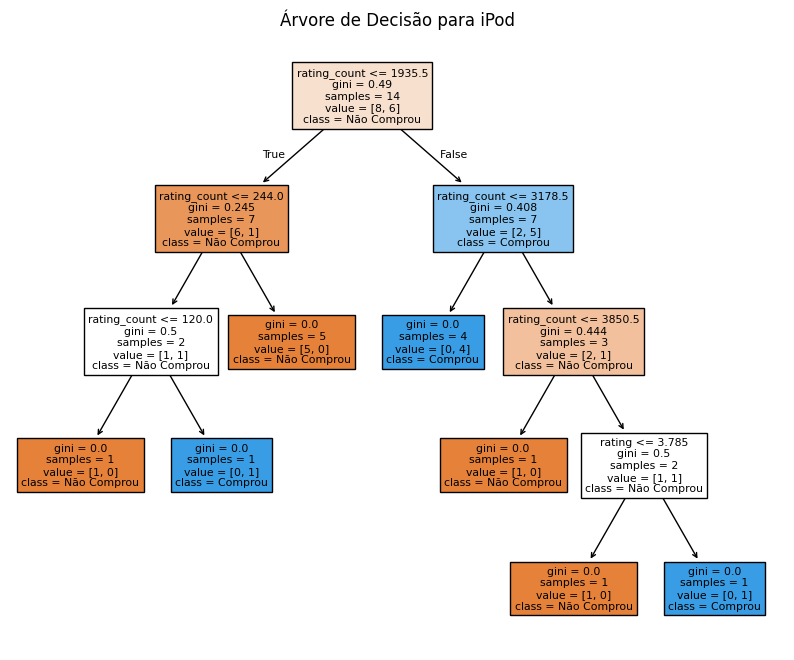

Árvore de decisão para Notebook
Matriz de Confusão:
[[2 1]
 [0 1]]
Acurácia: 0.75
Precisão: 0.50
Recall: 1.00
F1-Score: 0.67


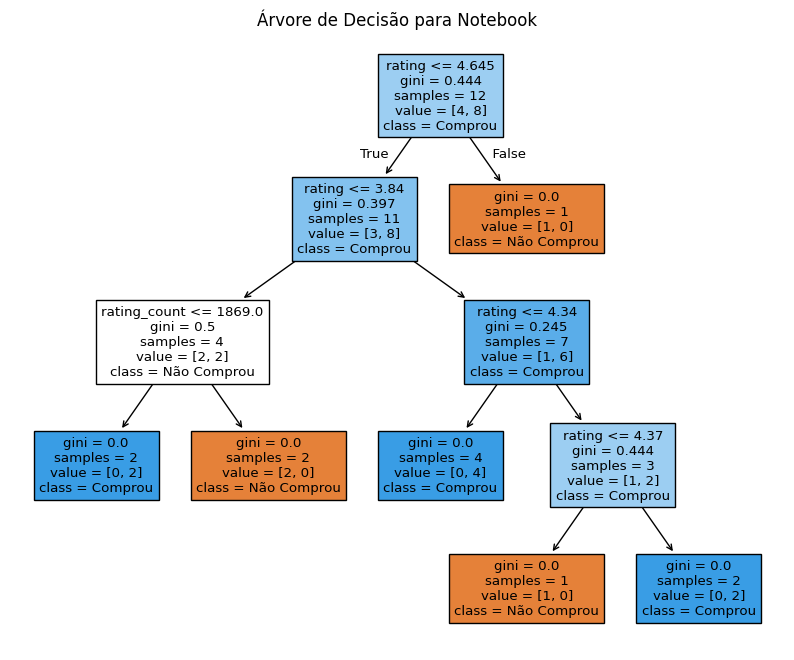

In [169]:
# blablabla

produtos = df['product_name'].unique()

for produto in produtos:
    print('Árvore de decisão para', produto)

    produto_df = df[df['product_name'] == produto]

    X = produto_df.drop(['purchased', 'product_name'], axis=1)  
    y = produto_df['purchased'] 

    if X.isnull().any().any() or y.isnull().any():
        print("Há valores faltantes nos dados. Verifique o DataFrame.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    print("Matriz de Confusão:")
    print(matrix)
    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    plt.figure(figsize=(10, 8))
    plot_tree(model, feature_names=X.columns, class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Árvore de Decisão para {produto}')
    plt.show()

In [213]:
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Precisão:", accuracy_score(y_test, y_pred))
print("Relatório", classification_report(y_test, y_pred))

Precisão: 0.75
Relatório               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

